In [1]:
import pandas as pd 
from pandas import Series, DataFrame

#Βημα 1


df = pd.read_csv(r'D:\university\DataMining\movies_metadata.csv',low_memory=False)


df['overview'] = df['overview'].astype(str).str.replace(r'[\r\n]+',' ',regex=True)

number_columns =  ['budget','revenue','popularity','runtime','vote_average','vote_count']

for column in number_columns:
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        
        
for column in ['runtime','budget','revenue']:
    if column in df.columns:
        df = df[df[column]>0]
 


df.shape

(5369, 24)

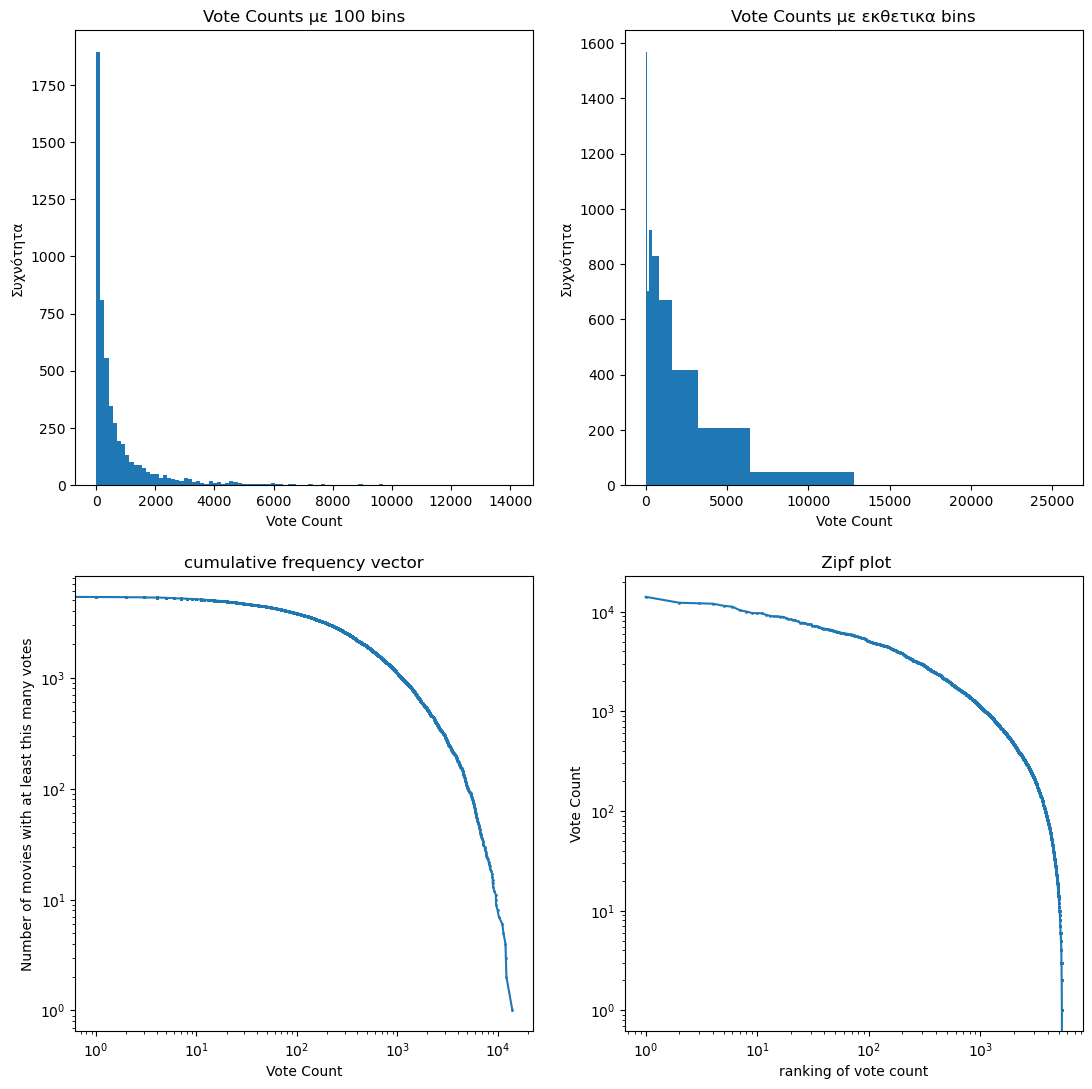

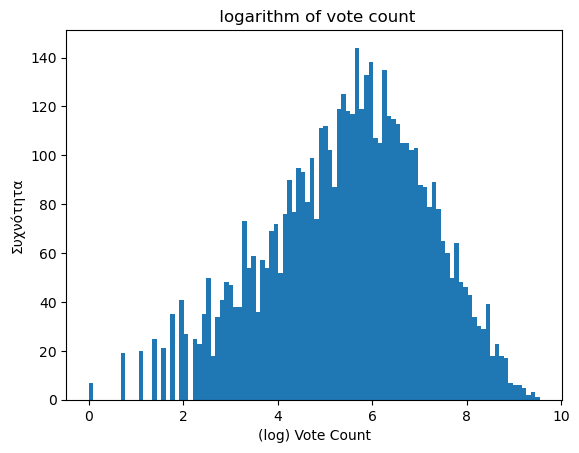

In [2]:
#Βημα 2

import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(2, 2,figsize=(13,13))



#2.1
df['vote_count'].plot(kind='hist', bins=100,ax = ax[0,0])


ax[0,0].set_title('Vote Counts με 100 bins')
ax[0,0].set_xlabel('Vote Count')
ax[0,0].set_ylabel('Συχνότητα')





#2.2
vote_count_total =  df['vote_count'].max()


bins=[]
start = 100

while start < vote_count_total*2:
    bins.append(start)
    start = start *2

    
bins =[0] + bins

df['vote_count'].plot(kind='hist', bins=bins,ax = ax[0,1])    
ax[0,1].set_title('Vote Counts με εκθετικα bins')
ax[0,1].set_xlabel('Vote Count')
ax[0,1].set_ylabel('Συχνότητα')




#2.3
vote_count_sorted = df['vote_count'].sort_values(ascending =True, inplace=False)
vote_count_length = len(vote_count_sorted)
at_least_vector = np.arange(vote_count_length , 0, -1)

vote_count_vector = pd.DataFrame({
    'vote_count': vote_count_sorted,
    'at_least': at_least_vector
})


ax[1,0].plot(vote_count_vector ['vote_count'], vote_count_vector['at_least'], marker='o', linestyle='-', markersize=1)
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_title('cumulative frequency vector')
ax[1,0].set_xlabel('Vote Count')
ax[1,0].set_ylabel('Number of movies with at least this many votes')





#2.4
vote_count_sorted2 = df['vote_count'].sort_values(ascending=False).reset_index(drop=True)
vote_count_length2= len(vote_count_sorted2)
rank= np.arange(0,vote_count_length2 ,  1)

zipf_vector = pd.DataFrame({
    'vote_count': vote_count_sorted2,
    'rank': rank+1
})

ax[1,1].plot(zipf_vector ['rank'], zipf_vector['vote_count'], marker='o', linestyle='-', markersize=1)

ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_title(' Zipf plot')
ax[1,1].set_ylabel('Vote Count')
ax[1,1].set_xlabel('ranking of vote count')
plt.show()








#2.5

df['log_vote_count'] = np.log(df['vote_count']+1)

df['log_vote_count'].plot(kind='hist', bins=100)
plt.title(' logarithm of vote count')
plt.xlabel('(log) Vote Count')
plt.ylabel('Συχνότητα')

plt.show()



Βημα 2

Βλέπουμε αρχικά ότι είναι πολύ πιο κατατοπιστική η επιλογή με την εκθετική αύξηση του μεγέθους των κάδων έναντι εκείνης 
με σταθερό μέγεθος, καθώς μας εμφανίζει πιο καθαρά τη συχνότητα για τις ταινίες με τις περισσότερες κριτικές.
Έπειτα, παρατηρούμε ότι όσο μεγαλύτερο είναι το vote_count τόσο μικρότερος είναι ο αριθμός των ταινιών με τουλάχιστον τόσες 
κριτικές (cumulative frequency vector), καθώς και μια σχεδόν γραμμική πτώση στον αριθμό των κριτικών, κάτι που παρατηρείται και
στο zipf plot, και σημαίνει ότι ακολουθείται η ίδια κατανομή.
Τέλος, βλέπουμε μέσω του λογαρίθμου του vote_count ότι υπάρχει μια περιοχή όσον αφορά τον αριθμό κριτικών που παρουσιάζει 
μεγαλύτερη συχνότητα, όπως επίσης και ότι υπάρχουν πολύ ταινίες για τις οποίες οι κριτικές είναι πάρα πολλές.

Runtime vs Budget Correlation: 0.19 (p-value: 0.0000)
Runtime vs Revenue Correlation: 0.19 (p-value: 0.0000)
Runtime vs Vote Average Correlation:   0.36 (p-value: 0.0000)


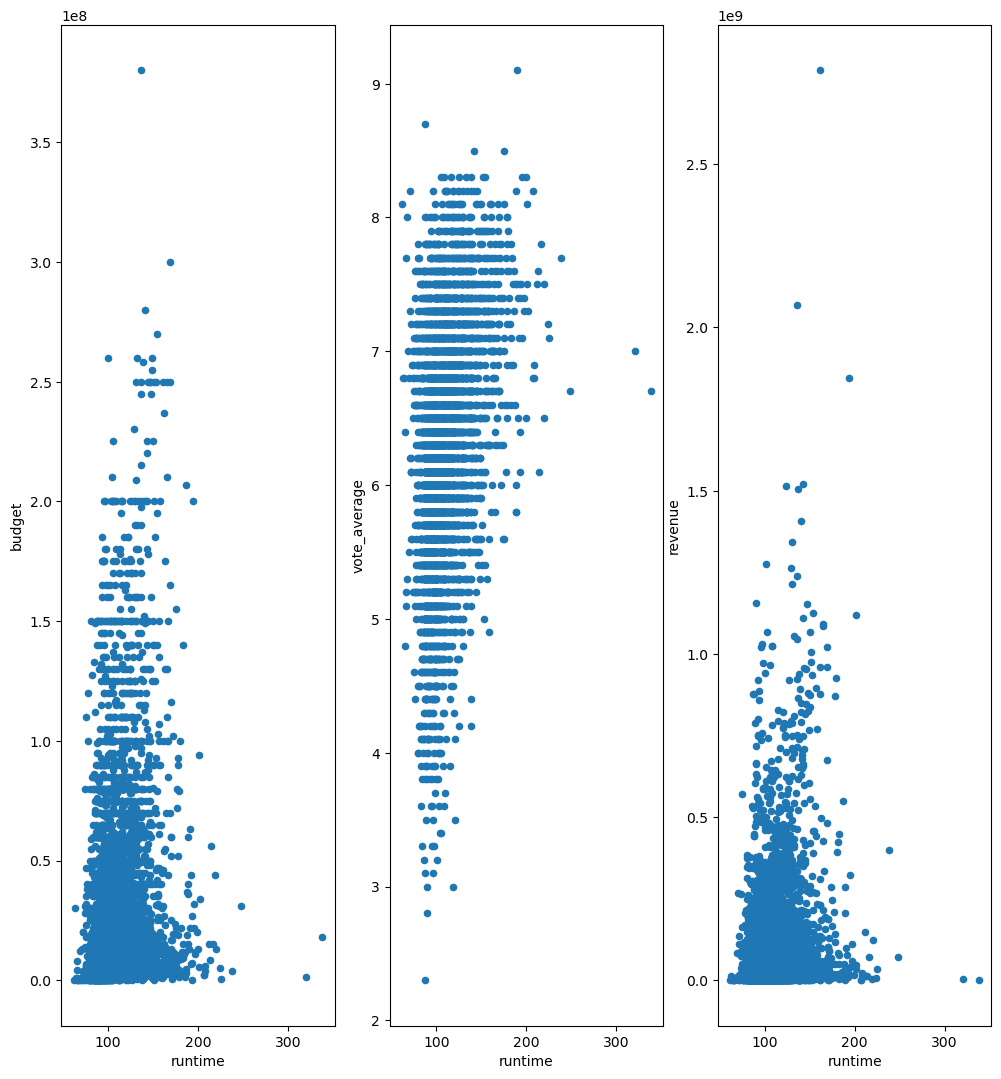

In [3]:
#Βήμα 3
import scipy.stats as stats
fig, ax = plt.subplots(1, 3, figsize=(12,13))


runtime_df = df[(df['runtime'] > 30) & 
    (df['vote_count'] > 10) & 
    (df['budget'] > 20000) & 
    (df['revenue'] > 20000)]


runtime_df.plot(kind ='scatter', x='runtime', y='budget', ax = ax[0]) #ειναι στην κλιμακα στο budget *100m 

runtime_df.plot(kind ='scatter', x='runtime', y='vote_average', ax = ax[1])

runtime_df.plot(kind ='scatter', x='runtime', y='revenue', ax = ax[2])   #*10billion



correlation_budget = stats.pearsonr(runtime_df['runtime'], runtime_df['budget'])
correlation_revenue = stats.pearsonr(runtime_df['runtime'], runtime_df['revenue'])
correlation_vote = stats.pearsonr(runtime_df['runtime'], runtime_df['vote_average'])

print(f"Runtime vs Budget Correlation: {correlation_budget.statistic:.2f} (p-value: {correlation_budget.pvalue:.4f})")
print(f"Runtime vs Revenue Correlation: {correlation_revenue.statistic:.2f} (p-value: {correlation_revenue.pvalue:.4f})")
print(f"Runtime vs Vote Average Correlation:   {correlation_vote.statistic:.2f} (p-value: {correlation_vote.pvalue:.4f})")



Βημα 3

Στο πρώτο γράφημα, βλέπουμε ότι τα "μεγάλα" budget ξοδεύονται αποκλειστικά σε ταινίες μίας μεσαίας προς μεγάλης διάρκειας.Τόσο οι ταινίες πολύ μικρής όσο και εκείνες πολύ μεγάλης διάρκειας είναι αυτές για τις οποίες δεν ξοδεύονται πολλά χρήματα. Κάτι το οποίο μπορούμε να πούμε ότι βρίσκει σε κάποιο βαθμό ανταπόκριση στα έσοδα των ταινίων, με τις ταινίες της αντίστοιχης διάρκειας να είναι εκείνες που φέρνουν και πιο πολλά χρήματα στα ταμεία , σε αντίθεση με εκείνες πολύ μικρής ή πολύ μεγάλης διάρκειας που φαίνεται να μην έχουν μεγάλα έσοδα. 
Όσον αφορά στη μέση βαθμολογία, βλέπουμε από τη μία πολλές ταινίες της διάρκειας με τα περισσότερα χρήματα να έχουν πολλές ταινίες υψηλής αξιολόγησης, όμως από την άλλη βλέπουμε για παράδειγμα ότι ταινίες μεγάλης διάρκειας έχουν σχετικά μεγάλη βαθμολογία, παρόλο που ούτε έχουν μεγάλο αρχικό budget ούτε αποφέρουν πολλά έσοδα.

Από το Pearson Correlation Coefficient βλέπουμε ότι επαληθεύεται η μη-γραμμικότητα μεταξύ των τιμών. Στην περίπτωση του vote average , μάλιστα, η υψηλότερη τιμή μας δείχνει και την ανοδική τάση των τιμών της βαθμολογίας. 


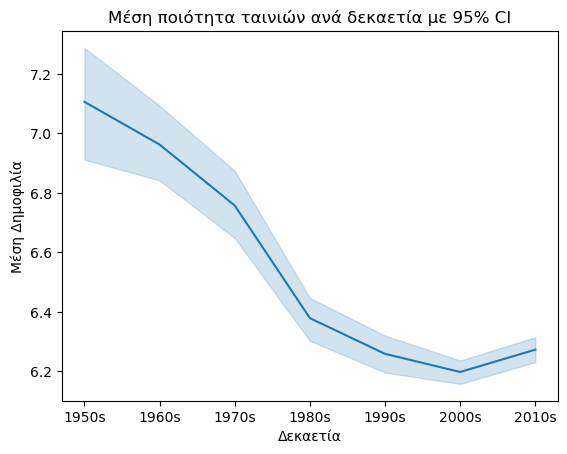

In [4]:
#Βημα 4 
import seaborn as sns

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
new_df = df[df['vote_count'] > 10]


year = new_df['release_date'].dt.year

#decade = ['1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

decades = (year// 10 * 10).astype(str) + "s"



movie_popularity= new_df['vote_average']

    
years_df = pd.DataFrame({
    'years': year,
    'decade': decades,
    'popularity': movie_popularity
})

decade_counts = years_df['decade'].value_counts()
new_decade_counts = decade_counts[decade_counts>50].index

years_df = years_df[years_df['decade'].isin(new_decade_counts)]


years_df = years_df.sort_values('decade', key=lambda x: x.str[:4].astype(int))# σορταρω για το plot , κανει τα πρωτα 4 στοιχεια int


sns.lineplot(data=years_df, x='decade', y='popularity',  errorbar=('ci', 95))
plt.title('Μέση ποιότητα ταινιών ανά δεκαετία με 95% CI')
plt.ylabel('Μέση Δημοφιλία')
plt.xlabel('Δεκαετία')
plt.show()    




Bήμα 4

Παρατηρούμε ότι η υπόθεση οτι η ποιότητα των ταινιών χειροτερεύει με το χρονο είναι σε πρώτη οπτική σωστή , καθώς η μέση βαθμολογία των ταινιών στις παλαιότερες δεκαετίες (συγκεκριμένα από τη δεκαετία του 1950 και μετά , καθώς προγενέστερες ταινίες έχουν αφαιρεθεί λόγω μη ύπαρξης ικανοποιητικού αριθμού ταινιών στα δεδομένα) είναι σημαντικά μεγαλύτερη από τις νεότερες . Υπάρχει μία μικρή βελτίωση της ποιότητας των ταινιών την δεκαετία του 2010 , χωρίς όμως να πλησιάζει στα επίπεδα παλαιότερων χρόνων.

Σημείωση: Ενδεχομένως η πολύ καλύτερη βαθμολογία των ταινίων παλαιότερων δεκαετιών να οφείλεται και στην μεγάλη διαφορά στον αριθμό ταινίων στα δεδομένα, καθώς είναι πάρα πολύ πιθανό να έχουμε μικρότερο δείγμα από τις παλιές ταινίες, έχοντας μάλιστα αυτές που έχουν "μείνει" στην εκτίμηση του κοινού μέσα στα χρόνια.  



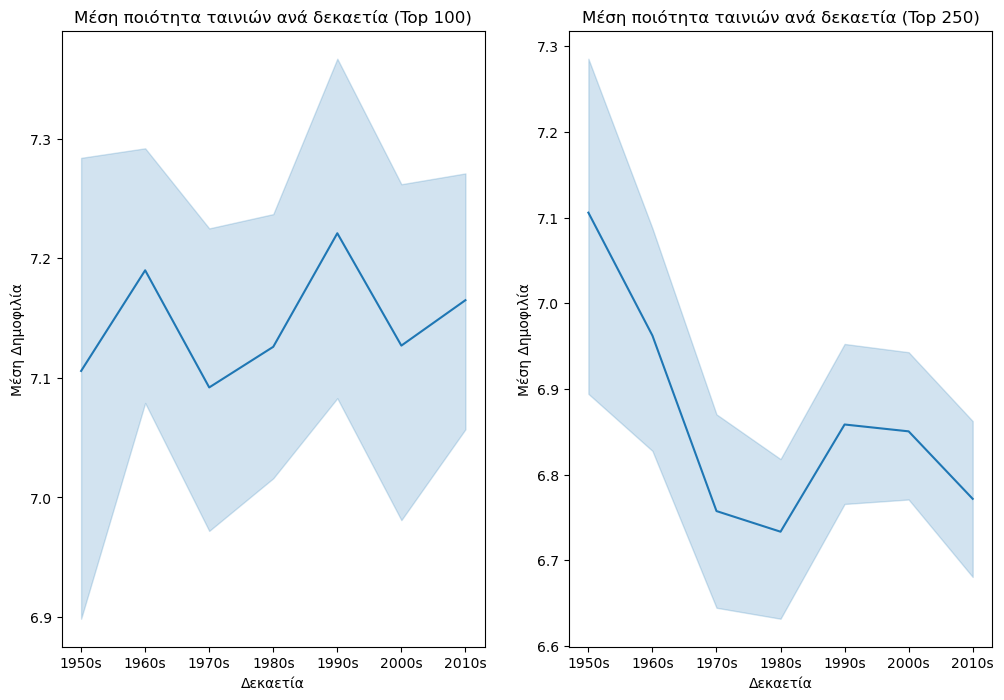

In [5]:
#Βημα 4 Bonus

fig, ax = plt.subplots(1, 2, figsize=(12,8))

    
new_years_df = pd.DataFrame({
    'vote_count': new_df['vote_count'],
    'decade': decades,
    'popularity': movie_popularity
})

new_years_df= new_years_df[new_years_df['decade'].isin(new_decade_counts)]

new_years_df2 = new_years_df.sort_values('vote_count',ascending=False).groupby('decade').head(100)
new_years_df2 = new_years_df2.sort_values('decade', key=lambda x: x.str[:4].astype(int))

sns.lineplot(data=new_years_df2, x='decade', y='popularity',  errorbar=('ci', 95),ax=ax[0])
ax[0].set_title('Μέση ποιότητα ταινιών ανά δεκαετία (Top 100)')
ax[0].set_ylabel('Μέση Δημοφιλία')
ax[0].set_xlabel('Δεκαετία')

new_years_df3 = new_years_df.sort_values('vote_count',ascending=False).groupby('decade').head(250)
new_years_df3 = new_years_df3.sort_values('decade', key=lambda x: x.str[:4].astype(int))
sns.lineplot(data=new_years_df3, x='decade', y='popularity',  errorbar=('ci', 95),ax=ax[1])
ax[1].set_title('Μέση ποιότητα ταινιών ανά δεκαετία (Top 250)')
ax[1].set_ylabel('Μέση Δημοφιλία')
ax[1].set_xlabel('Δεκαετία')
plt.show()    

Βήμα 4 Bonus 

Εδώ βλέπουμε ότι η υπόθεση που κάναμε στην σημείωση παραπάνω πράγματι ισχύει. Συγκεκριμένα, για να δείξουμε ότι το γράφημα στο βήμα 4 διαμορφώθηκε έτσι λόγω της ύπαρξης μόνο των παλιών ταινιών που λόγω δημοφιλίας διατηρήθηκαν στον χρόνο, εξετάζουμε αρχικά τις Top 100 ταινίες, βάσει δημοφιλίας, για όλες τις δεκαετίες. Παρατηρούμε ότι οι "καλές" ταινίες έχουν την ίδια περίπου απήχηση στο κοινό, ανεξάρτητα από τη δεκαετία. Για να το δείξουμε αυτό ακόμα περισσότερο, εξετάζουμε και τις Top 250 ταινίες κάθε δεκαετίας, όπου και βλέπουμε την καμπύλη στις νεότερες ταινίες να παίρνει μία μορφή πιο κοντά στο γράφημα που είχαμε στο βήμα 4, ενώ για παράδειγμα οι ταινίες της δεκαετίας του 1950 διατηρούν σταθερό το μέσο όρο, κάτι που σημαίνει ότι πιθανότατα δεν υπήρχαν καν 250 ταινίες από τότε στα δεδομένα. 

In [6]:
#Βημα 5
import ast

df['genres_list']= df['genres'].apply(ast.literal_eval)
df['genre_pairs'] = df['genres_list'].apply(lambda lst: [(d['id'], d['name']) for d in lst])


df_genres = df[['id','genre_pairs']].explode('genre_pairs')




genre_count= df_genres['genre_pairs'].value_counts()
final_genre_count = genre_count[genre_count > 100]
final_genres_count = genre_count[genre_count > 100].index
final_genres = df_genres[df_genres['genre_pairs'].isin(final_genres_count)].rename(columns={'genre_pairs': 'id , genre'})
#print(final_genres)

print("Αριθμός διαφορετικών genres:")
print(len(final_genre_count))
print("-------------------")


print("Αριθμός ταινιών ανά genre:")
print(final_genre_count)
print("-------------------")



Αριθμός διαφορετικών genres:
16
-------------------
Αριθμός ταινιών ανά genre:
genre_pairs
(18, Drama)               2583
(35, Comedy)              1846
(53, Thriller)            1503
(28, Action)              1413
(10749, Romance)          1013
(12, Adventure)            960
(80, Crime)                860
(878, Science Fiction)     633
(27, Horror)               586
(10751, Family)            532
(14, Fantasy)              511
(9648, Mystery)            443
(16, Animation)            293
(36, History)              235
(10752, War)               204
(10402, Music)             192
Name: count, dtype: int64
-------------------


In [7]:

#Βημα 5.2
df2 = pd.read_csv(r'D:\university\DataMining\credits.csv',low_memory=False)

df2['crew'] = df2['crew'].apply(ast.literal_eval)

df2 = df2[df2['crew'].apply(lambda x: any(i.get('job') == 'Director' and i.get('gender') in [1, 2] for i in x))]
#df2.shape


female_directors = df2['crew'].apply(lambda x: any(i.get('job') == 'Director' and i.get('gender') == 1 for i in x))
print("Number of movies directed my women:")
print(female_directors.sum())
print("-------------------")

male_directors = df2['crew'].apply(lambda x: any(i.get('job') == 'Director' and i.get('gender') == 2 for i in x))
print("Number of movies directed my men:")
print(male_directors.sum())
print("-------------------")


Number of movies directed my women:
1847
-------------------
Number of movies directed my men:
26260
-------------------


Contingency Table for Directors:
gender_label     Female  Male
genre_name                   
Action               28  1225
Adventure            28   891
Animation            13   337
Comedy              107  1561
Crime                15   732
Documentary           5    50
Drama               141  2094
Family               30   543
Fantasy              16   473
Foreign               1    19
History               8   195
Horror               17   497
Music                12   179
Mystery               6   387
Romance              85   821
Science Fiction      18   572
Thriller             29  1297
War                   5   169
Western               2    70


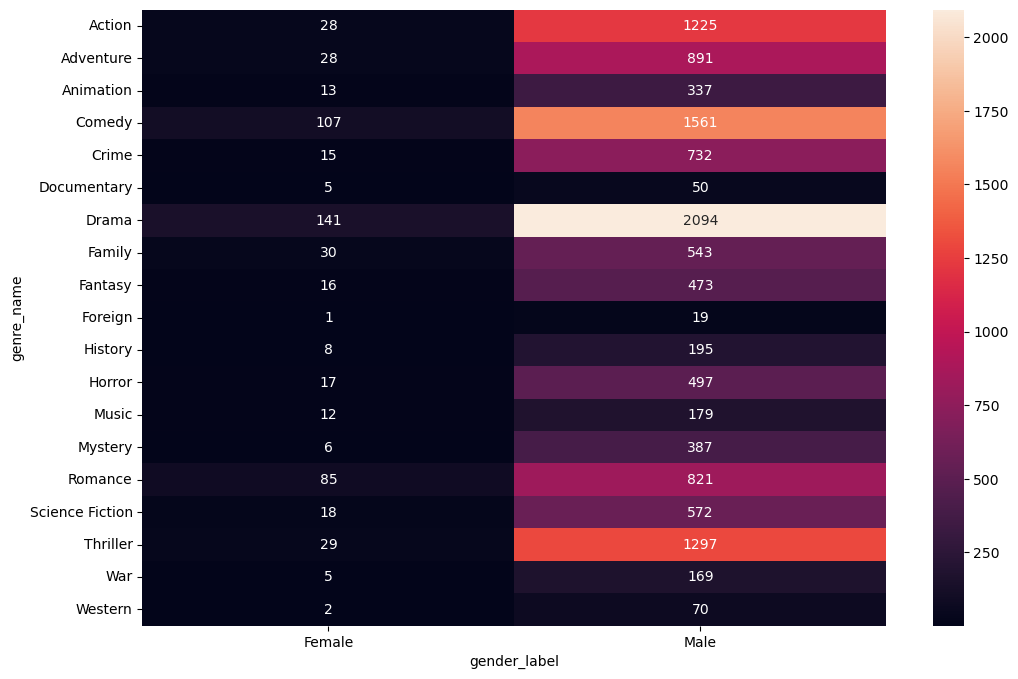

chi2: 150.81554529677803 p: 5.159351016781026e-23 dof: 18 expected:  [[5.59392649e+01 1.19706074e+03]
 [4.10280801e+01 8.77971920e+02]
 [1.56254930e+01 3.34374507e+02]
 [7.44666351e+01 1.59353336e+03]
 [3.33492664e+01 7.13650734e+02]
 [2.45543461e+00 5.25445654e+01]
 [9.97799337e+01 2.13522007e+03]
 [2.55811642e+01 5.47418836e+02]
 [2.18310459e+01 4.67168954e+02]
 [8.92885313e-01 1.91071147e+01]
 [9.06278593e+00 1.93937214e+02]
 [2.29471525e+01 4.91052847e+02]
 [8.52705474e+00 1.82472945e+02]
 [1.75451964e+01 3.75454804e+02]
 [4.04477047e+01 8.65552295e+02]
 [2.63401167e+01 5.63659883e+02]
 [5.91982963e+01 1.26680170e+03]
 [7.76810222e+00 1.66231898e+02]
 [3.21438713e+00 6.87856129e+01]]
---------------



Lift Table

gender_label       Female      Male
genre_name                         
Action           0.500543  1.023340
Adventure        0.682459  1.014839
Animation        0.831974  1.007852
Comedy           1.436885  0.979584
Crime            0.449785  1.025712
Documentary      2.0

In [8]:
#βημα 5.3


df['id'] = df['id'].astype(int)
df2['id'] = df2['id'].astype(int)


merged_df = pd.merge (df[['id','title','genres']],df2[['id','crew']],on='id')



merged_df['genres'] = merged_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
merged_df['crew'] = merged_df['crew'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


merged_df = merged_df.explode('genres')
merged_df = merged_df.explode('crew')

merged_df = merged_df.dropna(subset=['genres', 'crew'])

merged_df['genre_name'] = merged_df['genres'].apply(lambda x: x['name'])
merged_genre_count= merged_df['genre_name'].value_counts()
final_merged_genres_count = merged_genre_count[merged_genre_count > 100].index

merged_df = merged_df[merged_df['genre_name'].isin(final_merged_genres_count)]

merged_df = merged_df[merged_df['crew'].apply(lambda x: x.get('job') == 'Director')]
merged_df['gender_name'] = merged_df['crew'].apply(lambda x: x.get('gender'))
merged_df = merged_df[merged_df['gender_name'].isin([1, 2])]
merged_df['gender_label'] = merged_df['gender_name'].map({0:'Uknown' ,1: 'Female', 2: 'Male'})


contingency_table= pd.crosstab(merged_df['genre_name'], merged_df['gender_label'])
print("Contingency Table for Directors:")
print(contingency_table)


plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True,fmt="d")
plt.show()


#χ2 -test

chi2, p, dof,expected = stats.chi2_contingency(contingency_table)
print ('chi2:', chi2,'p:', p, 'dof:', dof,'expected: ', expected )
print("---------------")
print("\n\n")


expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
lift = contingency_table/expected_df
print('Lift Table\n')
print(lift)
#merged_df

Βημα 5.3

Από το contingency_table και το αντίστοιχο heatmap βλέπουμε ότι οι κατηγορίες με τις περισσότερες εμφανίσεις είναι οι ταινίες δράσης , οι κωμωδίες και οι δραματικές.Ακόμα, παρατηρούμε ότι σε όλες τις κατηγορίες υπερτερούν κατά πολύ οι άντρες σκηνοθέτες. Μάλιστα,σε ορισμένες κατηγορίες όπως οι ταινίες δράσης και οι επιστημονικής φαντασίας εχούμε σχεδόν εξ ολοκλήρου παρουσία ανδρών σκηνοθετών. 
Ακόμα, από το χ2 -test παρατηρούμε ότι υπάρχει σημαντική εξάρτηση μεταξύ φύλου και είδους , καθώς το p-value ειναι εξαιρετικά μικρό.

Όσον αφορά το Lift, βλέπουμε ότι :
Για τις γυναίκες υπάρχει μία μεγάλη συσχέτιση σε ρομαντικές ταινίες και ντοκιμαντέρ, μία καλή αλλά λίγο μικρότερη συσχέτιση στις κωμωδίες και στις μουσικές ταινίες, ενώ η πολυ μικρή τιμή σε κατηγορίες όπως τα θρίλερ, οι ταινίες μυστηρίου και τα crime movies δείχνει ότι σε ταινίες τέτοιου προσανατολισμού οι γυναίκες σκηνοθέτες υπο-εκπροσωπούνται σημαντικά.
Οι άντρες σκηνοθέτες από την άλλη βλέπουμε ότι από τη μία δεν παρουσίαζουν κάποιο Lift της τάξεως του 2(όπως πχ οι γυναίκες στην κατηγορία romance) , αλλά από την άλλη διαθέτουν σε σχεδόν όλες τις κατηγορίες ένα νούμερο κοντά στο 1. Μπορούμε δηλαδή να πούμε ότι δεν μπορούμε να βρούμε μία καθαρή συσχέτιση για το σε ποια κατηγορία θεωρείται ότι οι άντρες σκηνοθέτες είναι "προτιμότεροι", σε σχέση με τις γυναίκες , οι οποίες συγχέονται με το ¨στερεότυπο¨ ότι η ικανότητές τους επαφίενται σε συγκεκριμένους τομείς.

Revenue t-test
TtestResult(statistic=12.044810923353955, pvalue=5.756587884275888e-32, df=1507.3816527639628)


Budget t-test
TtestResult(statistic=17.00418639042558, pvalue=1.1230225299421081e-59, df=1579.1627711931255)


Vote average t-test
TtestResult(statistic=-13.495723352056666, pvalue=4.560729370093799e-40, df=2408.8299022681294)


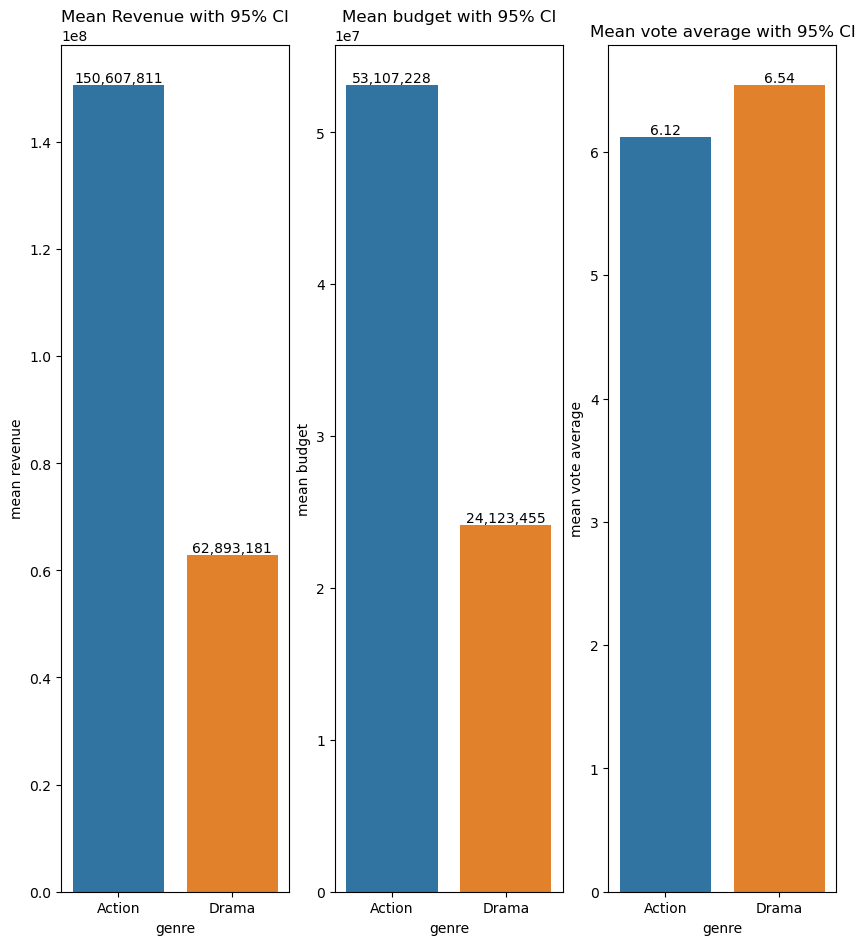

In [9]:
#Βημα 6 

fig, ax = plt.subplots(1, 3, figsize=(10,11))


merged_df2 = pd.merge (df[['id','title','genres','revenue','budget','vote_average']],df2[['id','cast']],on='id')
merged_df2['genres'] =merged_df2['genres'].apply(ast.literal_eval)
merged_df2['cast'] = merged_df2['cast'].apply(ast.literal_eval)
merged_df2 = merged_df2.explode('genres')
merged_df2 = merged_df2.dropna(subset=['genres', 'cast'])
merged_df2['genre_name'] = merged_df2['genres'].apply(lambda x: x['name'])

action_movies = merged_df2[merged_df2['genre_name'] == 'Action'].drop_duplicates(subset='id')
drama_movies = merged_df2[merged_df2['genre_name'] == 'Drama'].drop_duplicates(subset='id')


mean_revenue_action = action_movies['revenue'].mean()
mean_revenue_drama = drama_movies['revenue'].mean()
#merged_df2

revenue_df = pd.DataFrame({
    'genre': ['Action' , 'Drama'],
    'mean revenue': [mean_revenue_action,mean_revenue_drama]
})


mean_budget_action = action_movies['budget'].mean()
mean_budget_drama = drama_movies['budget'].mean()

budget_df = pd.DataFrame({
    'genre': ['Action' , 'Drama'],
    'mean budget': [mean_budget_action,mean_budget_drama]
})


mean_vote_average_action = action_movies['vote_average'].mean()
mean_vote_average_drama = drama_movies['vote_average'].mean()

vote_average_df = pd.DataFrame({
    'genre': ['Action' , 'Drama'],
    'mean vote average': [mean_vote_average_action,mean_vote_average_drama]
})



sns.barplot(x='genre',y='mean revenue', data = revenue_df, errorbar=('ci', 95),ax=ax[0])#*100m
ax[0].set_title("Mean Revenue with 95% CI")
for a in ax[0].containers:
    ax[0].bar_label(a, fmt='{:,.0f}')

    
sns.barplot(x='genre',y='mean budget', data = budget_df, errorbar=('ci', 95),ax=ax[1])#*10m
ax[1].set_title("Mean budget with 95% CI")
for a in ax[1].containers:
    ax[1].bar_label(a, fmt='{:,.0f}')

sns.barplot(x='genre',y='mean vote average', data = vote_average_df, errorbar=('ci', 95),ax=ax[2])
ax[2].set_title("Mean vote average with 95% CI")
for a in ax[2].containers:
    ax[2].bar_label(a, fmt='{:,.2f}')
    


    
    
#t-test 

action_revenue= action_movies['revenue']
drama_revenue = drama_movies['revenue']
t_test_revenue = stats.ttest_ind(action_revenue,drama_revenue,equal_var = False)
print('Revenue t-test')
print(t_test_revenue)
print("\n")



action_budget= action_movies['budget']
drama_budget = drama_movies['budget']
t_test_budget = stats.ttest_ind(action_budget,drama_budget,equal_var = False)
print('Budget t-test')
print(t_test_budget)
print("\n")




action_vote_average= action_movies['vote_average']
drama_vote_average = drama_movies['vote_average']
t_test_vote_average = stats.ttest_ind(action_vote_average,drama_vote_average,equal_var = False)
print('Vote average t-test')
print(t_test_vote_average)

Βήμα 6

Βλέπουμε αρχικά σχετικά με το μέσο όρο των εσόδων, ότι οι ταινίες δράσης αποφέρουν σημαντικά περισσότερα έσοδα από τις δραματικές. Το ίδιο φαινόμενο παρατηρείται και στο μέσο προϋπολογισμό των ταινιών, με τις ταινίες δράσης να διαθέτουν κατά μέσο όρο το διπλάσιο προϋπολογισμό από τις δραματικές .Όσον αφορά στην αξιολόγηση των ταινιών από την άλλη, βλέπουμε ότι οι δραματικές ταινίες είναι αυτές που συγκεντρώνουν ένα μέσο όρο βαθμολογίας καλύτερο από τις ταινίες δράσης .
Τα αποτελέσματα επιβεβαιώνονται από το t-test, δείχνοντας αφενός ότι η διαφορά δεν προκύπτει τυχαία και αφετέρου ότι υπάρχουν σημαντικές διαφορές μεταξύ των τιμών.
Με λίγα λόγια, μπορεί οι ταινίες δράσης να είναι εκείνες οι οποίες ξεχωρίζουν οικονομικά περισσότερο, όμως ποιοτικά υστερούν,έστω και λίγο, σε σύγκριση με τις δραματικές.



Mean Female director's Budget:
27196557.80


Mean Male director's Budget:
34112395.35


Median Female Budget:
13,000,000.00


Median Male Budget:
19,000,000.00


T-test :
TtestResult(statistic=-2.8026256792963586, pvalue=0.00543057357965259, df=274.04483793639383)


KS-test :
KstestResult(statistic=0.14336140523889626, pvalue=0.00014358320077179076, statistic_location=17700000.0, statistic_sign=1)


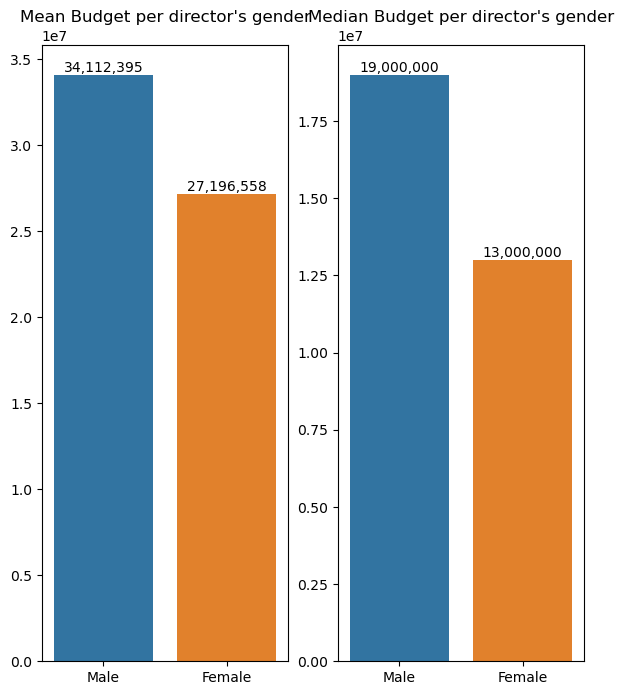

In [10]:
#Βημα 7 
fig, ax = plt.subplots(1, 2,figsize=(7,8))

merged_df3 = pd.merge (df[['id','budget',]],df2[['id','crew']],on='id')
merged_df3 = merged_df3.explode('crew')
merged_df3['job'] = merged_df3['crew'].apply(lambda x: x.get('job'))
merged_df3['gender'] = merged_df3['crew'].apply(lambda x: x.get('gender'))


directors= merged_df3[(merged_df3['job']=='Director') & (merged_df3['budget']>0)]
female_directors2 =directors[directors['gender']==1].copy()
male_directors2 =directors[directors['gender']==2].copy()

female_directors2['director_name'] = female_directors2['crew'].apply(lambda x: x.get('name'))
male_directors2['director_name'] = male_directors2['crew'].apply(lambda x: x.get('name'))


mean_female_budget = female_directors2['budget'].mean()
mean_male_budget = male_directors2['budget'].mean()


print("Mean Female director's Budget:")
print(f"{mean_female_budget:.2f}")
print("\n")
print("Mean Male director's Budget:")      
print(f"{mean_male_budget:.2f}")
print("\n")


median_female_budget = female_directors2['budget'].median()
median_male_budget = male_directors2['budget'].median()

print("Median Female Budget:")
print(f"{median_female_budget:,.2f}")
print("\n")
print("Median Male Budget:")
print(f"{median_male_budget:,.2f}")
print("\n")


directors_mean = ({
    'gender': ['Male','Female'],
    'mean Budget': [mean_male_budget,mean_female_budget]
})

directors_median = ({
    'gender': ['Male','Female'],
    'mean Budget': [median_male_budget,median_female_budget]
})

sns.barplot(x='gender',y='mean Budget', data = directors_mean,ax=ax[0])#*100m
ax[0].set_title("Mean Budget per director's gender")
for a in ax[0].containers:
    ax[0].bar_label(a, fmt='{:,.0f}')



sns.barplot(x='gender',y='mean Budget', data = directors_median,ax=ax[1])#*100m
ax[1].set_title("Median Budget per director's gender")
for a in ax[1].containers:
    ax[1].bar_label(a, fmt='{:,.0f}')
    


#t-test
t_test_directors= stats.ttest_ind(female_directors2['budget'],male_directors2['budget'],equal_var = False)
print("T-test :")
print(t_test_directors)
print("\n")



#ks-test

ks_test_directors = stats.ks_2samp(female_directors2['budget'],male_directors2['budget'])
print("KS-test :")
print(ks_test_directors)


Βημα 7 

Παρατηρούμε αρχικά την διαφορά στις μέσες τιμές των budget των αντρών και των γυναικών, όπου και βλέπουμε μία διαφορά της τάξης των 7 εκατομμυρίων υπέρ των ανδρών σκηνοθετών. Το ίδιο φαινόμενο παρατηρείται και με τη σύγκριση των διαμέσων τιμών,θεωρώντας ότι ο μέσος όρος μπορεί να επηρεαστεί από ελάχιστες ταινίες με υπερβολικά μεγάλο budget, με την τιμή των ανδρών να είναι κατά 6 εκατομμύρια μεγαλύτερη.

Τα συμπεράσματα επιβεβαιώνονται αρχικά από το t-test, όπου το αποτέλεσμα μας δείχνει την διαφορά στους μέσους όρους, δείχνοντας μας παράλληλα μέσω του p-value ότι το αποτέλεσμα είναι στατιστικά σημαντικό.
Τέλος, το ks-test μας δείχνει ότι υπάρχει διαφορά στις κατανομές. Συγκεκριμένα, στο σημείο που οι δύο κατανομές διαφέρουν πιο πολύ βλέπουμε μια διαφορά περίπου 14% ανάμεσα στις εμφανίσεις των δύο φύλων.

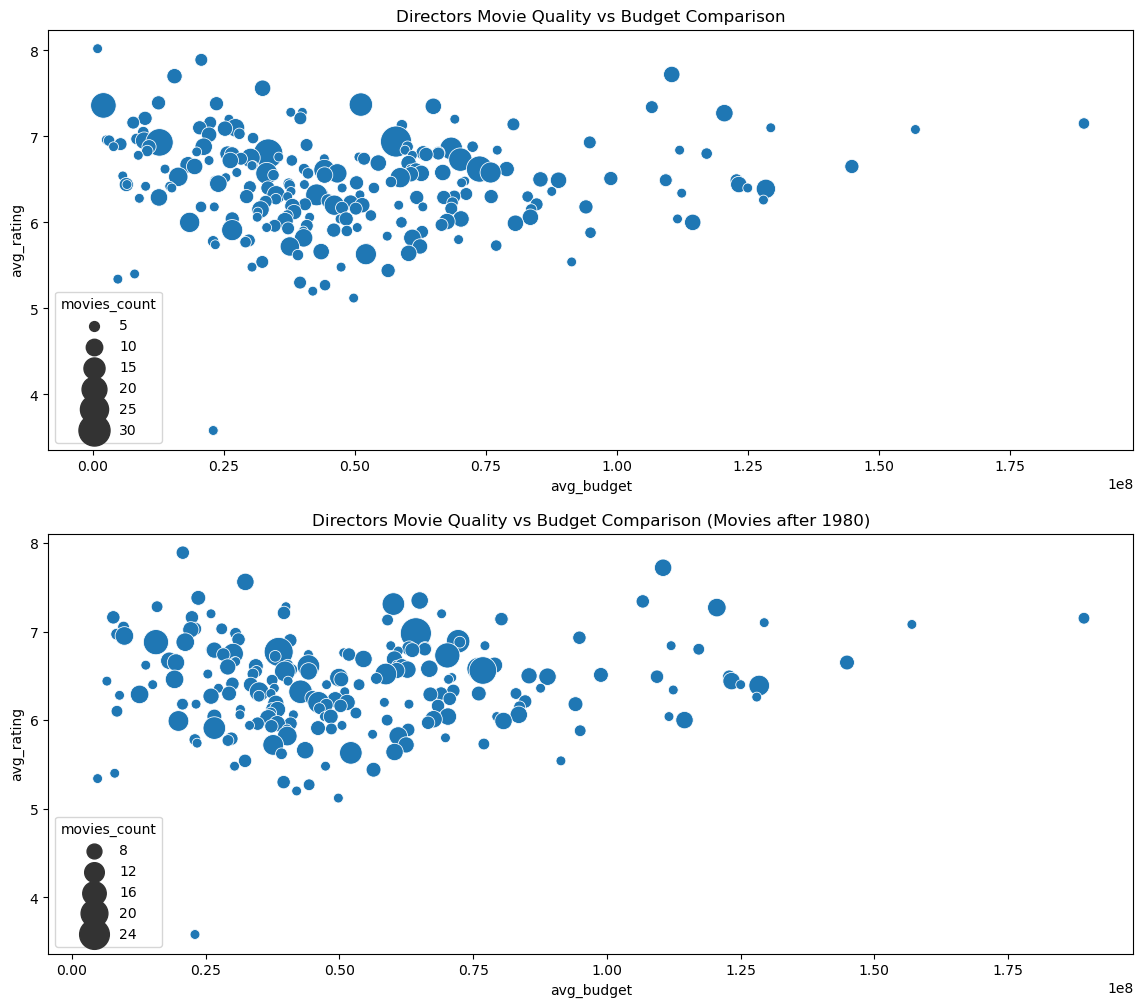



Top Rated Directors
                             avg_budget  avg_rating  movies_count
Director's name                                                  
Charlie Chaplin                  934600        8.02             5
Hayao Miyazaki                 20725385        7.89             7
Christopher Nolan             110500600        7.72            10
Stanley Kubrick                15611111        7.70             9
Quentin Tarantino              32420000        7.56            10
David Lynch                    12563750        7.39             8
Wes Anderson                   23625000        7.38             8
Martin Scorsese                51172222        7.37            18
Alfred Hitchcock                2038671        7.36            21
David Fincher                  65000000        7.35            10
James Cameron                 106700000        7.34             7
Alejandro González Iñárritu    40000000        7.28             5
Miloš Forman                   37800000        7.28   

In [11]:
#Βημα 8

fig, ax =  plt.subplots(2, 1,figsize=(14,12))


merged_df4 = pd.merge (df[['id','title','release_date','budget','vote_count','vote_average']],df2[['id','crew']],on='id')


merged_df4 = merged_df4.explode('crew')

merged_df4['year'] = merged_df4['release_date'].dt.year
merged_df4['job'] = merged_df4['crew'].apply(lambda x: x.get('job'))
merged_df4= merged_df4[(merged_df4['job']=='Director') & (merged_df4['budget']>0) & (merged_df4['vote_count']>50)]
merged_df4["Director's name"] =  merged_df4['crew'].apply(lambda x: x.get('name'))

merged_df4 = merged_df4.sort_values('vote_average', ascending=False)

#final_directors_df = merged_df4[["Director's name","title","vote_average","budget"]]


mean_budgets = merged_df4.groupby("Director's name")['budget'].mean()
mean_ratings = merged_df4.groupby("Director's name")['vote_average'].mean().round(2)
counts = merged_df4.groupby("Director's name")['title'].count()

final_directors_df = pd.DataFrame({
    'avg_budget': mean_budgets,
    'avg_rating': mean_ratings, 
    'movies_count': counts
})


final_directors_df = final_directors_df.sort_values('avg_rating', ascending=False)
final_directors_df = final_directors_df[final_directors_df['movies_count'] >= 5]
final_directors_df['avg_budget'] = final_directors_df['avg_budget'].astype(int)



#Για ταινιες μετα το 1980
df_1980 = merged_df4[merged_df4['year'] > 1980]


mean_budgets1980 = df_1980.groupby("Director's name")['budget'].mean()
mean_ratings1980 = df_1980.groupby("Director's name")['vote_average'].mean().round(2)
counts1980 = df_1980.groupby("Director's name")['title'].count()

final_directors_df1980 = pd.DataFrame({
    'avg_budget': mean_budgets1980,
    'avg_rating': mean_ratings1980, 
    'movies_count': counts1980
})

final_directors_df1980 = final_directors_df1980.sort_values('avg_rating', ascending=False)
final_directors_df1980 = final_directors_df1980[final_directors_df1980['movies_count'] >= 5]
final_directors_df1980['avg_budget'] = final_directors_df1980['avg_budget'].astype(int)

sns.scatterplot(data=final_directors_df,x='avg_budget',y='avg_rating',size='movies_count', sizes=(50, 500),ax=ax[0])
ax[0].set_title('Directors Movie Quality vs Budget Comparison')
sns.scatterplot(data=final_directors_df1980,x='avg_budget',y='avg_rating',size='movies_count', sizes=(50, 500),ax=ax[1])
ax[1].set_title('Directors Movie Quality vs Budget Comparison (Movies after 1980)')
print("\n")
plt.show()
#director_stats
print("\n")
print("Top Rated Directors")
print(final_directors_df.head(20))

print("\n")
print("Top Rated Directors (Movies after 1980)")
print(final_directors_df1980.head(20))




#### t-test 

median_budget = merged_df4['budget'].median()

low = final_directors_df1980[final_directors_df1980['avg_budget'] <= median_budget]['avg_rating']
high = final_directors_df1980[final_directors_df1980['avg_budget'] > median_budget]['avg_rating']


t_test_directors= stats.ttest_ind(high,low,equal_var = False)
print("\n\n\n")
print(t_test_directors)

Βημα 8

Η υπόθεσή μας είναι ότι αφού η ποιότητα των ταινιών δεν συνδέεται αναγκαστικά με το budget, τότε ίσως υπάρχει μία "αδικία" όσον αφορά τους σκηνοθέτες, όπου υπάρχουν πολλοί που ενώ παράγουν ποιοτικές ταινίες , δε τους έχει δοθεί στην καριέρα τους το budget που απολαμβάνουν άλλοι.
Ομαδοποιώντας τα δεδομένα ανά σκηνοθέτη και κρατώντας τους σκηνοθέτες με τουλάχιστον πέντε ταινίες στο ενεργητικό τους, βλέπουμε από το γράφημα ότι από τη μία για τις υψηλές τιμές του budget υπάρχουν σκηνοθέτες με σταθερά καλές ταινίες, αλλά και κάποιοι με όχι και τόσο καλό μέσο όρο.
Από την άλλη , βλέπουμε ότι στους σκηνοθέτες με μικρότερα budget, αφενός έχουμε πολύ περισσότερους , πράγμα αναμενόμενο, αφετέρου έχουμε αρκετούς οι οποίοι έχουν σταθερά καλές ταινίες ,χωρίς το budget άλλων σκηνοθετών. Μάλιστα για κάποιους από αυτους έχουμε και μεγάλο δείγμα ταινίών , που μας δείχνει ότι ήταν πάρα πολύ συνεπείς στο να παράγουν καλό αποτέλεσμα με λιγότερους πόρους.
Τέλος , στον πίνακα με τους Top 20 σκηνοθέτες με βάση τη μέση βαθμολογία , βλέπουμε και την εμφάνιση κάποιων ονομάτων με μικρότερο μέσο όρο στο budget .

Διαπιστώνουμε όμως ότι στα δεδομένα μας έχουμε σε υψηλές θέσεις σκηνοθέτες όπως για παράδειγμα ο Charlie Chaplin , που δραστηριοποιούνταν σε δεκαετίες όπου τα budget των ταινιών ήταν πολύ μικρότερα σε σχέση με μεταγενέστερες ταινίες. Γι' αυτό τον λόγο, επιλέγουμε να εξετάσουμε ξεχωριστά τις ταινίες που κυκλοφόρησαν μετά το 1980, προσπαθώντας να συγκρίνουμε τις εποχές στις οποίες οι ανισότητες στα budget είναι μικρότερες. 
Παρατηρούμε ότι ναι μεν κάποιοι σκηνοθέτες οι οποίοι αρχικά βρίσκονταν στις πρώτες θέσεις του πίνακα δεν υπάρχουν πλέον, αλλά η υπόθεση εξακολουθεί να ισχύει , καθώς πολλοί σκηνοθέτες με μικρότερα budget εξακολουθούν να έχουν πολύ καλές αξιολογήσεις, με κάποιους μάλιστα να έχουν και θέση στο Top 20 τόσο διαχρονικά όσο και τις ταινίες μετά το 1980.

Η υπόθεση μας επιβεβαιώνεται με το t-test , όπου αφού χωρίσαμε τους σκηνοθέτες με βάση το budget σε low και high (παίρνοντας το διάμεσο και όχι τη μέση τιμή) , βλέπουμε ότι το υψηλό p-value(περίπου 0.86) μας δείχνει ότι δεν υπάρχει στατιστικά σημαντική διαφορά στη μέση βαθμολογία μεταξύ low και high budget σκηνοθετών. Παράλληλλα τη τιμη statistic κοντά στο 0.17 μας δείχνει ότι η απόκλιση στο μέσο rating είναι πολύ μικρή. 